In [1]:
# importing 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import bbi

# 

In [2]:
# data needed from sleuth to compare 

# s2c to collapse tpm into averages
s2c = pd.read_csv("/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/supplementary/s2c.csv", index_col = 0)

# t2g to compare gene-level analysis
t2g = pd.read_csv("/project/fudenber_735/genomes/mm9/ensembl/ensembl_relational_downloads/biomaRt_mm9_t2g.csv", index_col = 0)

In [3]:
# tpm values from sleuth matrix
sleuth_matrix = pd.read_csv("/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/supplementary/sleuth_matrix.csv")

In [4]:
sleuth_matrix = sleuth_matrix.rename(columns = {'Unnamed: 0' : "target_id"}) 
sleuth_matrix.head(4)

,target_id,SRR5517500,SRR5517501,SRR5517502,SRR5517503,SRR5517504,SRR5517505,SRR5517506,SRR5517507,SRR5517508,...,SRR5517514,SRR5517515,SRR5517516,SRR5517517,SRR5517518,SRR5517519,SRR5517520,SRR5517521,SRR5517522,SRR5517523
0,ENSMUST00000000001,39.526672,32.475073,35.733834,43.632436,38.998357,45.479582,46.949717,45.727178,37.967990,...,51.978648,53.475671,54.755076,57.286379,45.659645,19.492515,48.568292,54.081777,56.250874,61.982748
1,ENSMUST00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUST00000000010,0.685869,1.016973,1.113045,2.929267,0.829355,0.723069,0.676170,0.678165,2.251083,...,0.883225,0.539575,0.704452,0.494842,0.950310,0.786166,0.941070,0.509465,0.559375,0.681799
3,ENSMUST00000000028,21.409744,24.086444,21.876858,15.070121,22.138165,24.281706,18.849206,21.084065,17.920251,...,29.161810,25.840052,32.558737,26.556631,16.778541,6.153680,16.397125,24.813609,22.445236,20.272369


In [5]:
lst = s2c['condition'].unique()
smps = list(s2c[s2c['condition'] == lst[0]]['sample'])
print(smps)

['SRR5517500', 'SRR5517505', 'SRR5517510']


In [6]:
average_tpm = sleuth_matrix[['target_id']]

In [7]:
lst = s2c['condition'].unique()

for condition in lst:
    
    samples = list(s2c[s2c['condition'] == lst[0]]['sample'])
    
    average_tpm[condition+'_mean_TPM'] = sleuth_matrix.loc[:, samples].mean(axis=1)

/tmp/SLURM_3964625/ipykernel_32576/5999347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_tpm[condition+'_mean_TPM'] = sleuth_matrix.loc[:, samples].mean(axis=1)
/tmp/SLURM_3964625/ipykernel_32576/5999347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_tpm[condition+'_mean_TPM'] = sleuth_matrix.loc[:, samples].mean(axis=1)
/tmp/SLURM_3964625/ipykernel_32576/5999347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [8]:
average_tpm.head(3)

,target_id,RNA-seq_CTCF-AID_untreated_mean_TPM,RNA-seq_CTCF-AID_auxin1day_mean_TPM,RNA-seq_CTCF-AID_auxin2days_mean_TPM,RNA-seq_CTCF-AID_auxin4days_mean_TPM,RNA-seq_CTCF-AID_washoff2days_mean_TPM,RNA-seq_WT-untagged_untreated_mean_TPM,RNA-seq_WT-untagged_auxin2days_mean_TPM,RNA-seq_WT-untagged_auxin4days_mean_TPM
0,ENSMUST00000000001,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293
1,ENSMUST00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUST00000000010,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324


In [9]:
t2g = t2g.rename(columns = {'ensembl_transcript_id' : 'target_id', 'ensemble_gene_id' : 'ens_gene', 'mgi_symbol' : 'ext_gene'})

In [10]:
t2g.head(3)

,target_id,ensembl_gene_id,ext_gene
1,ENSMUST00000115962,ENSMUSG00000079832,NaN
2,ENSMUST00000099422,ENSMUSG00000074844,NaN
3,ENSMUST00000115951,ENSMUSG00000079818,NaN


In [11]:
# Collapse sleuth_matrix into average tpms per condition, and include ext_gene name
average_tpm = average_tpm.merge(t2g, on='target_id', how='left')

In [12]:
average_tpm.head(3)

,target_id,RNA-seq_CTCF-AID_untreated_mean_TPM,RNA-seq_CTCF-AID_auxin1day_mean_TPM,RNA-seq_CTCF-AID_auxin2days_mean_TPM,RNA-seq_CTCF-AID_auxin4days_mean_TPM,RNA-seq_CTCF-AID_washoff2days_mean_TPM,RNA-seq_WT-untagged_untreated_mean_TPM,RNA-seq_WT-untagged_auxin2days_mean_TPM,RNA-seq_WT-untagged_auxin4days_mean_TPM,ensembl_gene_id,ext_gene
0,ENSMUST00000000001,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293,42.392293,ENSMUSG00000000001,Gnai3
1,ENSMUST00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ENSMUSG00000000003,Pbsn
2,ENSMUST00000000010,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324,0.627324,ENSMUSG00000020875,Hoxb9


In [13]:
average_tpm['ext_gene']

0         Gnai3
1          Pbsn
2         Hoxb9
3        Cdc45l
4          Igf2
          ...  
89360       NaN
89361       NaN
89362       NaN
89363       NaN
89364       NaN
Name: ext_gene, Length: 89365, dtype: object

In [14]:
fpkm = pd.read_csv("/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/supplementary/supplement-10_RNA_seq_FPKM.csv", index_col = 0)

In [15]:
fpkm

,tracking_id,locus,CTCF-AID_untreated_mean_FPKM,CTCF-AID_1day_mean_FPKM,CTCF-AID_2days_mean_FPKM,CTCF-AID_4days_mean_FPKM,CTCF-AID_washoff_mean_FPKM,1day.1,2days.1,4days.1,2days_washoff_2days.1,WT_untreated_mean_FPKM,WT_2days_mean_FPKM,WT_4days_mean_FPKM
0,0610005C13Rik,chr7:52823164-52845080,0.784511,0.804255,1.040841,2.176798,1.209881,no,no,no,no,0.531110,0.539697,0.414068
1,0610007P14Rik,chr12:87156404-87165495,71.716133,74.856200,63.412767,59.250033,67.995733,no,no,no,no,57.020867,49.716167,57.023633
2,0610009B22Rik,chr11:51498886-51502136,69.529333,76.436433,61.336067,38.937500,58.353700,no,no,yes,no,58.497000,46.990267,58.072767
3,0610009L18Rik,chr11:120209991-120212504,0.944842,1.154941,0.905838,1.097459,0.889548,no,no,no,no,1.180704,1.977405,0.825640
4,0610009O20Rik,chr18:38398058-38422283,17.565900,20.652933,20.476800,20.633733,18.857300,no,no,no,no,18.864133,18.413433,18.779333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24310,Zyx,chr6:42299826-42330557,8.531693,8.734813,11.727350,24.111000,11.359220,no,no,yes,no,13.565800,17.260200,15.288367
24311,Zzef1,chr11:72609727-72740622,2.597283,2.411157,2.507930,3.121180,2.856007,no,no,no,no,2.718923,1.981210,2.533253
24312,Zzz3,chr3:152058966-152344396,9.986867,8.012557,7.069317,8.471867,10.256167,no,no,no,no,8.890843,7.591897,8.981187
24313,a,chr2:154839305-154876748,0.087051,0.167859,0.370351,0.402713,0.090154,no,no,no,no,0.066810,0.176484,0.272123


In [16]:
# Just looking at the sets of tracking_ids vs ext_genes shared between the two:
print(len(average_tpm['ext_gene'].unique()))
print(len(fpkm['tracking_id'].unique()))

print(len(set(average_tpm['ext_gene'].unique()) - set(fpkm['tracking_id'].unique())))
print(len(set(fpkm['tracking_id'].unique()) - set(average_tpm['ext_gene'].unique())))

20306
24315
3221
7230


Looks like there's about 3000 genes that are in 

[' RNA-seq_CTCF-AID_untreated' ' RNA-seq_CTCF-AID_auxin1day'
 ' RNA-seq_CTCF-AID_auxin2days' ' RNA-seq_CTCF-AID_auxin4days'
 ' RNA-seq_CTCF-AID_washoff2days' ' RNA-seq_WT-untagged_untreated'
 ' RNA-seq_WT-untagged_auxin2days' ' RNA-seq_WT-untagged_auxin4days']
(30308, 4)


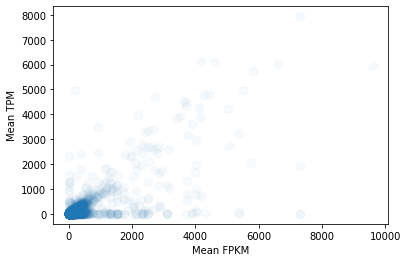

In [17]:
print(lst)
condition = lst[1]
tpmColName = condition+"_mean_TPM"
noAuxin = condition.split('auxin')
fpkmColName =''.join(noAuxin).split(' RNA-seq_')[1]+"_mean_FPKM"

                
#merged = fpkm['tracking_id', fpkmColName].merge(average_tpm['ext_gene', tpmColName], how='inner')
justThisCondition = fpkm[['tracking_id',fpkmColName]].merge(average_tpm[['ext_gene', tpmColName]], how = 'inner', left_on='tracking_id', right_on='ext_gene')
print(justThisCondition.shape)

plt.xlabel("Mean FPKM")
plt.ylabel("Mean TPM")
plt.scatter(justThisCondition[fpkmColName], justThisCondition[tpmColName], s=70, alpha=0.03)

(0.0, 500.0)

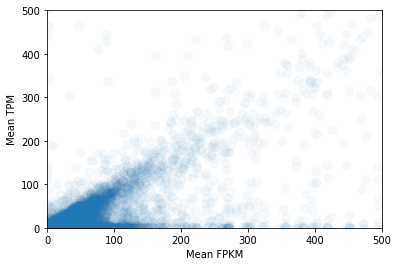

In [18]:
plt.xlabel("Mean FPKM")
plt.ylabel("Mean TPM")
plt.scatter(justThisCondition[fpkmColName], justThisCondition[tpmColName], s=70, alpha=0.03)
plt.xlim(0, 500)
plt.ylim(0, 500)

(0.0, 100.0)

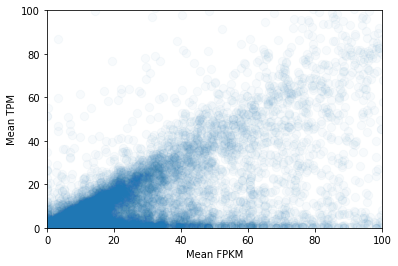

In [19]:
plt.xlabel("Mean FPKM")
plt.ylabel("Mean TPM")
plt.scatter(justThisCondition[fpkmColName], justThisCondition[tpmColName], s=70, alpha=0.03)
plt.xlim(0, 100)
plt.ylim(0, 100)

Looks like a lot of datapoints that have fairly high FPKM have zero TPM. 

# Next Steps for rest of week:

* maybe compare list of sig genes (for one condition)

--> 2day vs untreated (sig vs not sig DE) : make 2x2 grid comparison of these sets of conditions

* DEG vs CHIP CTCF (Fig. 6 or something)
--> missing fold-change from kallisto genes -- need to recreate (from kallisto data)
    --> 
--> can also do DET vs CHiP

# Looking at CTCF binding around TSS of DETs (DE Transcriptsssss!)

In [20]:
conditions = s2c['condition'].unique()
print(conditions)

[' RNA-seq_CTCF-AID_untreated' ' RNA-seq_CTCF-AID_auxin1day'
 ' RNA-seq_CTCF-AID_auxin2days' ' RNA-seq_CTCF-AID_auxin4days'
 ' RNA-seq_CTCF-AID_washoff2days' ' RNA-seq_WT-untagged_untreated'
 ' RNA-seq_WT-untagged_auxin2days' ' RNA-seq_WT-untagged_auxin4days']


In [21]:
# Importing the .csv outputs from sleuth WT for each of the conditions into pandas dataframes:
wt_data = {}

folder = "/project/fudenber_735/GEO/nora_2017_rna-seq_SRP106652/WT-mm9-results/"

for c in conditions[1:]:
    
    df = pd.read_csv(folder+"sleuth_WT_"+c+".csv", index_col = 0)
    wt_data[c] = df

/tmp/SLURM_3964625/ipykernel_32576/3754657929.py:8: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder+"sleuth_WT_"+c+".csv", index_col = 0)
/tmp/SLURM_3964625/ipykernel_32576/3754657929.py:8: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder+"sleuth_WT_"+c+".csv", index_col = 0)
/tmp/SLURM_3964625/ipykernel_32576/3754657929.py:8: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder+"sleuth_WT_"+c+".csv", index_col = 0)
/tmp/SLURM_3964625/ipykernel_32576/3754657929.py:8: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder+"sleuth_WT_"+c+".csv", index_col = 0)
/tmp/SLURM_3964625/ipykernel_32576/3754657929.py:8: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import

In [22]:
de_df = wt_data[conditions[1]]
de_df.head(4)

,target_id_ RNA-seq_CTCF-AID_auxin1day,ens_gene_ RNA-seq_CTCF-AID_auxin1day,ext_gene_ RNA-seq_CTCF-AID_auxin1day,pval_ RNA-seq_CTCF-AID_auxin1day,qval_ RNA-seq_CTCF-AID_auxin1day,b_ RNA-seq_CTCF-AID_auxin1day,se_b_ RNA-seq_CTCF-AID_auxin1day,mean_obs_ RNA-seq_CTCF-AID_auxin1day,var_obs_ RNA-seq_CTCF-AID_auxin1day,tech_var_ RNA-seq_CTCF-AID_auxin1day,sigma_sq_ RNA-seq_CTCF-AID_auxin1day,smooth_sigma_sq_ RNA-seq_CTCF-AID_auxin1day,final_sigma_sq_ RNA-seq_CTCF-AID_auxin1day
1,ENSMUST00000168900,NaN,NaN,2.872365e-17,1.380315e-12,-1.905176,0.225421,7.059538,0.878807,0.001977,0.044892,0.074244,0.074244
2,ENSMUST00000102763,ENSMUSG00000020392,Cdkn2aipnl,6.894337e-16,1.606176e-11,-1.662413,0.205938,7.556659,0.711634,0.000876,0.020375,0.062740,0.062740
3,ENSMUST00000006451,ENSMUSG00000006288,Ttc5,1.002711e-15,1.606176e-11,-1.839779,0.229212,7.017841,0.887628,0.003380,0.036714,0.075427,0.075427
4,ENSMUST00000029644,ENSMUSG00000028013,Ppa2,1.007347e-14,1.210202e-10,-1.821647,0.235406,6.862515,0.965567,0.002906,0.015535,0.080218,0.080218


In [23]:
sig_DE = de_df[de_df['qval_'+conditions[1]] < 0.05]

In [24]:
sig_DE.shape

(76, 13)

## Get TSS annotations for the genes


todo: Can either use RefSeq (or maybe ensembl) to locate TSS 

* try just using the start_codon annotation
* parse out attributes so that gene_id, transcript_id, etc become their own column
* load bigwig files, other stuff needed for bbi stackup
* adjust plot_[change to 'DET']_CTCF_binding for this df
   * will be 'b' column instead of log10foldchange
   * qval for cutoff
* idea: make getting TSS/window a separate function so can be done dynamically instead of needing to add/join with the WT results

In [25]:
transcriptome_intervals = pd.read_table("/project/fudenber_735/genomes/mm9/ensembl/Mus_musculus.NCBIM37.65.gtf.gz", header=None, 
                         names=['seqname', 'type', 'feature', 'start', 'end', 'score', 'strand', 'frame',
                                'attributes'])

transcriptome_intervals.shape

/tmp/SLURM_3964625/ipykernel_32576/3946265205.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  transcriptome_intervals = pd.read_table("/project/fudenber_735/genomes/mm9/ensembl/Mus_musculus.NCBIM37.65.gtf.gz", header=None,


(1259220, 9)

In [26]:
print(pd.unique(transcriptome_intervals['feature']))

['exon' 'CDS' 'start_codon' 'stop_codon']


In [27]:
# parses the string list of attributes from gtf file into a list
def split_ensembl_atts(attributeString):
    
    groups = attributeString.split(";")[0:5]
    data = [x.split('"')[1].strip() for x in groups]
    labels = [x.split('"')[0].strip() for x in groups]

    return data

In [28]:
## formatting of genomic feature references downloaded from ensembl GTF

# parsing attributes column to get gene_id, transcript_id, exon_number, gene_name, transctript_name into their own columns
attributes_listed =  [split_ensembl_atts(line) for line in transcriptome_intervals['attributes']]

attribute_df = pd.DataFrame(attributes_listed, columns =['gene_id', 'transcript_id', 'exon_number', 'gene_name', 'transcript_name'])

mm9_tx = pd.concat([transcriptome_intervals, attribute_df], axis=1)

In [29]:
len(pd.unique(mm9_tx['transcript_id']))

95883

In [30]:
print(pd.unique(mm9_tx['feature']))

['exon' 'CDS' 'start_codon' 'stop_codon']


In [31]:
print(pd.unique(mm9_tx['type']))

['protein_coding' 'processed_transcript' 'nonsense_mediated_decay'
 'retained_intron' 'lincRNA' 'snRNA' 'misc_RNA' 'pseudogene' 'miRNA'
 'transcribed_processed_pseudogene' 'antisense' 'retrotransposed' 'snoRNA'
 'rRNA' 'unitary_pseudogene' 'sense_intronic' 'ambiguous_orf'
 'transcribed_unprocessed_pseudogene' 'IG_V_gene' 'IG_D_gene' 'IG_J_gene'
 'IG_C_gene' 'processed_pseudogene' 'ncrna_host' 'TEC'
 'unprocessed_pseudogene' 'non_coding' 'polymorphic_pseudogene'
 'disrupted_domain' 'Mt_tRNA' 'Mt_rRNA']


In [32]:
# Building a reference dataframe for TSS, from ensembl mm9 GTF download
mm9_tss = mm9_tx[mm9_tx['feature'] == 'start_codon']

# cleaning out less-well defined chromosome numbers
mm9_tss = mm9_tss.loc[False==( mm9_tss['seqname'].str.contains('NT_'))]
mm9_tss = mm9_tss.loc[False==( mm9_tss['seqname'].str.contains('MT'))]

# formatting chromosome name so will be readable by other tools
mm9_tss["chrom"] = 'chr' + mm9_tss["seqname"]

In [33]:
print(mm9_tss.shape)
mm9_tss.head(10)

(11222, 15)


,seqname,type,feature,start,end,score,strand,frame,attributes,gene_id,transcript_id,exon_number,gene_name,transcript_name,chrom
90,18,protein_coding,start_codon,3123410,3123412,.,-,0,"gene_id ""ENSMUSG00000091539""; transcript_id ""...",ENSMUSG00000091539,ENSMUST00000165255,1,Vmn1r238,protein_coding,chr18
94,18,protein_coding,start_codon,3327533,3327535,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000151311,1,Crem,protein_coding,chr18
111,18,protein_coding,start_codon,3327533,3327535,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000150235,2,Crem,protein_coding,chr18
131,18,protein_coding,start_codon,3299448,3299450,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000122958,1,Crem,protein_coding,chr18
150,18,protein_coding,start_codon,3327533,3327535,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000154135,2,Crem,protein_coding,chr18
167,18,protein_coding,start_codon,3327533,3327535,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000025069,2,Crem,protein_coding,chr18
186,18,protein_coding,start_codon,3327533,3327535,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000082141,2,Crem,protein_coding,chr18
205,18,protein_coding,start_codon,3327533,3327535,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000165086,2,Crem,protein_coding,chr18
225,18,protein_coding,start_codon,3325470,3325472,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000073545,3,Crem,protein_coding,chr18
239,18,protein_coding,start_codon,3281708,3281710,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000140332,1,Crem,protein_coding,chr18


In [34]:
# extracting coding sequences
mm9_cds = mm9_tx[mm9_tx['feature'] == 'CDS']

# cleaning out less-well defined chromosome numbers
mm9_cds = mm9_cds.loc[False==( mm9_cds['seqname'].str.contains('NT_'))]
mm9_cds = mm9_cds.loc[False==( mm9_cds['seqname'].str.contains('MT'))]

# formatting chromosome name so will be readable by other tools
mm9_cds["chrom"] = 'chr' + mm9_cds["seqname"]

# Add TSS column -- choose the location to be either the start or end index (depending on strand)
mm9_cds['TSS_loc'] = np.where((mm9_cds['strand'] == '+'), mm9_cds['start'], mm9_cds['end'])

print(mm9_cds.shape)
mm9_cds.head(10)

(103223, 16)


,seqname,type,feature,start,end,score,strand,frame,attributes,gene_id,transcript_id,exon_number,gene_name,transcript_name,chrom,TSS_loc
89,18,protein_coding,CDS,3122495,3123412,.,-,0,"gene_id ""ENSMUSG00000091539""; transcript_id ""...",ENSMUSG00000091539,ENSMUST00000165255,1,Vmn1r238,protein_coding,chr18,3123412
93,18,protein_coding,CDS,3327492,3327535,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000151311,1,Crem,protein_coding,chr18,3327535
96,18,protein_coding,CDS,3325359,3325476,.,-,1,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000151311,2,Crem,protein_coding,chr18,3325476
98,18,protein_coding,CDS,3295320,3295414,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000151311,3,Crem,protein_coding,chr18,3295414
100,18,protein_coding,CDS,3295038,3295180,.,-,1,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000151311,4,Crem,protein_coding,chr18,3295180
102,18,protein_coding,CDS,3287902,3288090,.,-,2,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000151311,5,Crem,protein_coding,chr18,3288090
104,18,protein_coding,CDS,3273420,3273576,.,-,2,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000151311,6,Crem,protein_coding,chr18,3273576
106,18,protein_coding,CDS,3267589,3267730,.,-,1,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000151311,7,Crem,protein_coding,chr18,3267730
110,18,protein_coding,CDS,3327492,3327535,.,-,0,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000150235,2,Crem,protein_coding,chr18,3327535
113,18,protein_coding,CDS,3325359,3325476,.,-,1,"gene_id ""ENSMUSG00000063889""; transcript_id ""...",ENSMUSG00000063889,ENSMUST00000150235,3,Crem,protein_coding,chr18,3325476


In [35]:
print(len(pd.unique(mm9_cds['transcript_id'])))

12368


In [36]:
print(len(pd.unique(mm9_tss['transcript_id'])))

11198


In [37]:
# Checking to see if mm9_tss is a subset of mm9_cds
A = pd.DataFrame(pd.unique(mm9_tss['transcript_id']))
B = pd.DataFrame(pd.unique(mm9_cds['transcript_id']))

print(len(A.merge(B)) == len(A))

True


In [38]:
sig_DE = sig_DE.merge(mm9_cds, left_on='target_id_'+conditions[1], right_on='transcript_id')

In [39]:
sig_DE

,target_id_ RNA-seq_CTCF-AID_auxin1day,ens_gene_ RNA-seq_CTCF-AID_auxin1day,ext_gene_ RNA-seq_CTCF-AID_auxin1day,pval_ RNA-seq_CTCF-AID_auxin1day,qval_ RNA-seq_CTCF-AID_auxin1day,b_ RNA-seq_CTCF-AID_auxin1day,se_b_ RNA-seq_CTCF-AID_auxin1day,mean_obs_ RNA-seq_CTCF-AID_auxin1day,var_obs_ RNA-seq_CTCF-AID_auxin1day,tech_var_ RNA-seq_CTCF-AID_auxin1day,...,strand,frame,attributes,gene_id,transcript_id,exon_number,gene_name,transcript_name,chrom,TSS_loc
0,ENSMUST00000006451,ENSMUSG00000006288,Ttc5,1.002711e-15,1.606176e-11,-1.839779,0.229212,7.017841,0.887628,0.003380,...,-,0,"gene_id ""ENSMUSG00000006288""; transcript_id ""...",ENSMUSG00000006288,ENSMUST00000006451,1,Ttc5,protein_coding,chr14,51405163
1,ENSMUST00000006451,ENSMUSG00000006288,Ttc5,1.002711e-15,1.606176e-11,-1.839779,0.229212,7.017841,0.887628,0.003380,...,-,0,"gene_id ""ENSMUSG00000006288""; transcript_id ""...",ENSMUSG00000006288,ENSMUST00000006451,2,Ttc5,protein_coding,chr14,51401282
2,ENSMUST00000006451,ENSMUSG00000006288,Ttc5,1.002711e-15,1.606176e-11,-1.839779,0.229212,7.017841,0.887628,0.003380,...,-,2,"gene_id ""ENSMUSG00000006288""; transcript_id ""...",ENSMUSG00000006288,ENSMUST00000006451,3,Ttc5,protein_coding,chr14,51397643
3,ENSMUST00000006451,ENSMUSG00000006288,Ttc5,1.002711e-15,1.606176e-11,-1.839779,0.229212,7.017841,0.887628,0.003380,...,-,0,"gene_id ""ENSMUSG00000006288""; transcript_id ""...",ENSMUSG00000006288,ENSMUST00000006451,4,Ttc5,protein_coding,chr14,51397087
4,ENSMUST00000006451,ENSMUSG00000006288,Ttc5,1.002711e-15,1.606176e-11,-1.839779,0.229212,7.017841,0.887628,0.003380,...,-,2,"gene_id ""ENSMUSG00000006288""; transcript_id ""...",ENSMUSG00000006288,ENSMUST00000006451,5,Ttc5,protein_coding,chr14,51395057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,ENSMUST00000103031,ENSMUSG00000020776,Fbf1,3.491306e-05,2.621480e-02,-4.334904,1.047382,4.654088,3.104708,0.869748,...,-,0,"gene_id ""ENSMUSG00000020776""; transcript_id ""...",ENSMUSG00000020776,ENSMUST00000103031,27,Fbf1,protein_coding,chr11,116007074
176,ENSMUST00000103031,ENSMUSG00000020776,Fbf1,3.491306e-05,2.621480e-02,-4.334904,1.047382,4.654088,3.104708,0.869748,...,-,0,"gene_id ""ENSMUSG00000020776""; transcript_id ""...",ENSMUSG00000020776,ENSMUST00000103031,28,Fbf1,protein_coding,chr11,116006856
177,ENSMUST00000103031,ENSMUSG00000020776,Fbf1,3.491306e-05,2.621480e-02,-4.334904,1.047382,4.654088,3.104708,0.869748,...,-,2,"gene_id ""ENSMUSG00000020776""; transcript_id ""...",ENSMUSG00000020776,ENSMUST00000103031,29,Fbf1,protein_coding,chr11,116005856
178,ENSMUST00000103031,ENSMUSG00000020776,Fbf1,3.491306e-05,2.621480e-02,-4.334904,1.047382,4.654088,3.104708,0.869748,...,-,0,"gene_id ""ENSMUSG00000020776""; transcript_id ""...",ENSMUSG00000020776,ENSMUST00000103031,30,Fbf1,protein_coding,chr11,116004780


## Trying gff utils to read GTF file --> get TSS

https://pythonhosted.org/gffutils/database-import.html

https://github.com/daler/metaseq/blob/master/doc/source/example_session.ipynb

In [65]:
import gffutils
import pybedtools
from pybedtools.featurefuncs import TSS
from gffutils.helpers import asinterval
import bioframe as bf
from gtfparse import read_gtf

In [66]:
## Run only once: output message said ~70% (may have had an error/not finished loading --> look into this 

# db = gffutils.create_db("/project/fudenber_735/genomes/mm9/ensembl/Mus_musculus.NCBIM37.65.gtf.gz", "/project/fudenber_735/genomes/mm9/ensembl/Mus_musculus.NCBIM37.65.gtf.db")
db = gffutils.FeatureDB("/project/fudenber_735/genomes/mm9/ensembl/Mus_musculus.NCBIM37.65.gtf.db")

In [48]:
def tss_generator():
    """
    Generator function to yield TSS of each annotated transcript
    """
    for transcript in db.features_of_type('transcript'):
        yield TSS(asinterval(transcript), upstream=1, downstream=0)

        
# A BedTool made out of a generator, and saved to file.
tsses = pybedtools.BedTool(tss_generator()).saveas('/project/fudenber_735/genomes/mm9/ensembl/tsses.gtf')

In [49]:
type(tsses)

## note: successfully downloaded a big file tsses.gtf --> now just figure out how to import into either a pandas df or bioframe (which one?)

pybedtools.bedtool.BedTool

In [90]:
# Reading gtf file that contains only the parsed TSSes
tss_df = read_gtf('/project/fudenber_735/genomes/mm9/ensembl/tsses.gtf')

# cleaning out less-well defined chromosome numbers
tss_df = tss_df.loc[False==( tss_df['seqname'].str.contains('NT_'))]
tss_df = tss_df.loc[False==( tss_df['seqname'].str.contains('MT'))]

# paste 'chr' to all chromosome names
tss_df["seqname"] = 'chr' + tss_df["seqname"]

# rename column to chrom to match bedframe/bioframe format
tss_df = tss_df.rename(columns= {"seqname" : "chrom"})

tss_df.head(10)

/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
INFO:root:Extracted GTF attributes: ['transcript_id', 'gene_id']


,chrom,source,feature,start,end,score,strand,frame,transcript_id,gene_id
0,chr3,gffutils_derived,transcript,107949065,107949065,NaN,-,0,ENSMUST00000000001,ENSMUSG00000000001
1,chrX,gffutils_derived,transcript,75098963,75098963,NaN,-,0,ENSMUST00000000003,ENSMUSG00000000003
2,chrX,gffutils_derived,transcript,75098870,75098870,NaN,-,0,ENSMUST00000114041,ENSMUSG00000000003
3,chr16,gffutils_derived,transcript,18812066,18812066,NaN,-,0,ENSMUST00000000028,ENSMUSG00000000028
4,chr16,gffutils_derived,transcript,18811720,18811720,NaN,-,0,ENSMUST00000096990,ENSMUSG00000000028
5,chr16,gffutils_derived,transcript,18812081,18812081,NaN,-,0,ENSMUST00000115585,ENSMUSG00000000028
6,chr7,gffutils_derived,transcript,149762816,149762816,NaN,-,0,ENSMUST00000132294,ENSMUSG00000000031
7,chr7,gffutils_derived,transcript,149764049,149764049,NaN,-,0,ENSMUST00000136359,ENSMUSG00000000031
8,chr7,gffutils_derived,transcript,149762444,149762444,NaN,-,0,ENSMUST00000140716,ENSMUSG00000000031
9,chr7,gffutils_derived,transcript,149764001,149764001,NaN,-,0,ENSMUST00000149974,ENSMUSG00000000031


In [92]:
# Checking if the transcript ids occur uniquely (one TSS per transcript?)
print(len(pd.unique(tss_df['transcript_id'])))
print(len(tss_df['transcript_id']))

95458
95458


In [93]:
# Creating bioframe out of tss set
tss_bf = bf.from_any(tss_df, name_col='chrom')

In [147]:
cleaner_tss = tss_df.loc[False==( tss_df['chrom'].str.contains('X'))]
cleaner_tss = cleaner_tss.loc[False==( cleaner_tss['chrom'].str.contains('Y'))]

In [151]:
condition = conditions[2]
DE_result_df = wt_data[condition]

# lookup the TSS for this set of transcripts
DE_results_TSS = DE_result_df.merge(tss_df, left_on='target_id_'+condition, right_on='transcript_id')

# how many did not have a transcript/were dropped?
ni = len(DE_result_df)
ntss = len(DE_results_TSS)
print("Out of " + str(ni) + " transcripts from the sleuth output results, " + str(ntss) + " had corresponding TSS from ensembl GTF files.")
print("Lost " + str(ni-ntss) + " transcripts for this analysis.")



Out of 88366 transcripts from the sleuth output results, 87992 had corresponding TSS from ensembl GTF files.
Lost 374 transcripts for this analysis.


In [158]:
print(pd.unique(DE_results_TSS['chrom']))
DE_results_TSS.head(10)


['chr14' 'chr3' 'chr11' 'chr15' 'chrX' 'chr7' 'chr17' 'chr8' 'chr2' 'chr9'
 'chr6' 'chr4' 'chr10' 'chr12' 'chr5' 'chr1' 'chr13' 'chr19' 'chr18'
 'chr16' 'chrY']


,target_id_ RNA-seq_CTCF-AID_auxin2days,ens_gene_ RNA-seq_CTCF-AID_auxin2days,ext_gene_ RNA-seq_CTCF-AID_auxin2days,pval_ RNA-seq_CTCF-AID_auxin2days,qval_ RNA-seq_CTCF-AID_auxin2days,b_ RNA-seq_CTCF-AID_auxin2days,se_b_ RNA-seq_CTCF-AID_auxin2days,mean_obs_ RNA-seq_CTCF-AID_auxin2days,var_obs_ RNA-seq_CTCF-AID_auxin2days,tech_var_ RNA-seq_CTCF-AID_auxin2days,...,chrom,source,feature,start,end,score,strand,frame,transcript_id,gene_id
0,ENSMUST00000006451,ENSMUSG00000006288,Ttc5,1.310202e-19,6.296178e-15,-2.076555,0.229212,7.017841,0.887628,0.003380,...,chr14,gffutils_derived,transcript,51405194,51405194,NaN,-,0,ENSMUST00000006451,ENSMUSG00000006288
1,ENSMUST00000168900,NaN,NaN,4.730789e-18,1.136690e-13,-1.952073,0.225421,7.059538,0.878807,0.001977,...,chr3,gffutils_derived,transcript,89050359,89050359,NaN,+,0,ENSMUST00000168900,ENSMUSG00000042747
2,ENSMUST00000029644,ENSMUSG00000028013,Ppa2,5.032497e-17,8.061221e-13,-1.974098,0.235406,6.862515,0.965567,0.002906,...,chr3,gffutils_derived,transcript,132973073,132973073,NaN,+,0,ENSMUST00000029644,ENSMUSG00000028013
3,ENSMUST00000102763,ENSMUSG00000020392,Cdkn2aipnl,3.508500e-16,4.215025e-12,-1.679309,0.205938,7.556659,0.711634,0.000876,...,chr11,gffutils_derived,transcript,51781162,51781162,NaN,+,0,ENSMUST00000102763,ENSMUSG00000020392
4,ENSMUST00000078953,ENSMUSG00000015377,Fam116b,1.415829e-15,1.360753e-11,-2.970831,0.372095,5.188072,1.953792,0.017774,...,chr15,gffutils_derived,transcript,89026906,89026906,NaN,-,0,ENSMUST00000078953,ENSMUSG00000015377
5,ENSMUST00000087557,ENSMUSG00000067377,Tspan6,3.485095e-15,2.791271e-11,-2.395991,0.304362,5.824121,1.240407,0.006985,...,chrX,gffutils_derived,transcript,130432969,130432969,NaN,-,0,ENSMUST00000087557,ENSMUSG00000067377
6,ENSMUST00000171066,NaN,NaN,6.435442e-15,3.865690e-11,1.735006,0.222576,9.518412,1.044134,0.000130,...,chr7,gffutils_derived,transcript,150822491,150822491,NaN,-,0,ENSMUST00000171066,ENSMUSG00000090852
7,ENSMUST00000155572,NaN,NaN,5.652235e-15,3.865690e-11,1.501574,0.192227,8.060573,0.724042,0.000452,...,chr7,gffutils_derived,transcript,125766027,125766027,NaN,+,0,ENSMUST00000155572,ENSMUSG00000030650
8,ENSMUST00000151797,NaN,NaN,6.857866e-14,3.661719e-10,-4.770005,0.636802,3.644737,5.267040,0.119087,...,chr17,gffutils_derived,transcript,23981140,23981140,NaN,-,0,ENSMUST00000151797,ENSMUSG00000024114
9,ENSMUST00000034097,ENSMUSG00000031672,Got2,9.811040e-14,4.714695e-10,-1.353943,0.181898,8.730232,0.418300,0.000300,...,chr8,gffutils_derived,transcript,98412448,98412448,NaN,-,0,ENSMUST00000034097,ENSMUSG00000031672


Text(0.5, 1.0, 'Average CTCF binding for DETs in set:  RNA-seq_CTCF-AID_auxin2days')

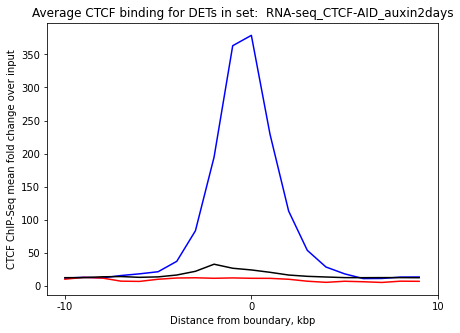

In [156]:
# Todo: plot distance from TSS on x-axis) versus average CTCF binding (from stackup)
chip_seq_file = "/scratch/pokorny/Elphege_2017/GSM2609195_CTCF_ChIP-exo_WT-untagged_untreated_rep1_ENC1_tagDensity.bw"
qval_cutoff = 0.05

# Getting plots ready
git, ax = plt.subplot(figsize=[7,5])

# how many did not have a transcript/were dropped?
ni = len(DE_result_df)
ntss = len(DE_results_TSS)
print("Out of " + str(ni) + " transcripts from the sleuth output results, " + str(ntss) + " had corresponding TSS from ensembl GTF files.")
print("Lost " + str(ni-ntss) + " transcripts for this analysis.")

# Extracting significantly DE transcripts
sig_DE = DE_results_TSS[DE_results_TSS['qval_'+condition] < qval_cutoff]
sig_DE_up = sig_DE[sig_DE['b_'+condition] > 0]
sig_DE_down = sig_DE[sig_DE['b_'+condition] <= 0]

# Will also look at enrichment around transcripts that were in RNAseq dataset that did not have significant DE
nonsig_DE = DE_results_TSS[DE_results_TSS['qval_'+condition] >= qval_cutoff]

nbins = 20

# Generating summary of chip seq signal within the bins -1000 and +1000 from the TSS loc
with bbi.open(chip_seq_file) as f:
    DE_up_matrix = f.stackup(sig_DE_up['chrom'], sig_DE_up['start'] - 1000, sig_DE_up['end'] + 1000, bins=nbins)
    DE_down_matrix = f.stackup(sig_DE_down['chrom'], sig_DE_down['start'] - 1000, sig_DE_down['end'] + 1000, bins=nbins)
    nonsig_DE_matrix = f.stackup(nonsig_DE['chrom'], nonsig_DE['start'] - 1000, nonsig_DE['end'] + 1000, bins=nbins)



ax.plot(np.nanmean(DE_down_matrix, axis=0), color = 'b' )

ax.plot(np.nanmean(DE_up_matrix, axis=0), color = 'r' )

ax.plot(np.nanmean(nonsig_DE_matrix, axis=0), color = 'k')

ax.set(xticks=np.arange(0, nbins+1, 10),
       xticklabels=(np.arange(0, nbins+1, 10)-nbins//2),
       xlabel='Distance from boundary, kbp',
       ylabel='CTCF ChIP-Seq mean fold change over input')
ax.set_title("Average CTCF binding for DETs in set: " + condition)


Out of 88366 transcripts from the sleuth output results, 87992 had corresponding TSS from ensembl GTF files.
Lost 374 transcripts for this analysis.
Out of 88366 transcripts from the sleuth output results, 87992 had corresponding TSS from ensembl GTF files.
Lost 374 transcripts for this analysis.
Out of 88366 transcripts from the sleuth output results, 87992 had corresponding TSS from ensembl GTF files.
Lost 374 transcripts for this analysis.
Out of 88366 transcripts from the sleuth output results, 87992 had corresponding TSS from ensembl GTF files.
Lost 374 transcripts for this analysis.


IndexError: Out of bounds on buffer access (axis 0)

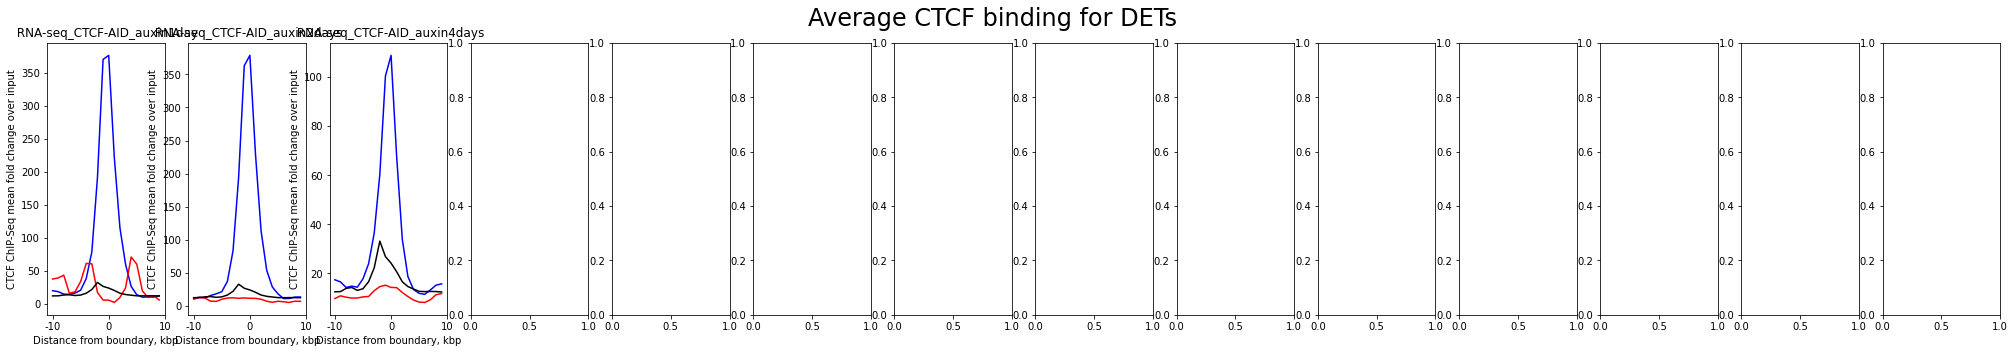

In [162]:
# Todo: plot distance from TSS on x-axis) versus average CTCF binding (from stackup)
chip_seq_file = "/scratch/pokorny/Elphege_2017/GSM2609195_CTCF_ChIP-exo_WT-untagged_untreated_rep1_ENC1_tagDensity.bw"
DE_result_dict = wt_data
qval_cutoff = 0.05

# Getting plots ready
fig, ax = plt.subplots(1,2*len(DE_result_dict), figsize=(35, 5))
fig.suptitle("Average CTCF binding for DETs", fontsize=24)
i = 0

for condition, DE_result_df in DE_result_dict.items():
    
    # lookup the TSS for this set of transcripts
    DE_results_TSS = DE_result_df.merge(tss_df, left_on='target_id_'+condition, right_on='transcript_id')

    # how many did not have a transcript/were dropped?
    ni = len(DE_result_df)
    ntss = len(DE_results_TSS)
    print("Out of " + str(ni) + " transcripts from the sleuth output results, " + str(ntss) + " had corresponding TSS from ensembl GTF files.")
    print("Lost " + str(ni-ntss) + " transcripts for this analysis.")

    # Extracting significantly DE transcripts
    sig_DE = DE_results_TSS[DE_results_TSS['qval_'+condition] < qval_cutoff]
    sig_DE_up = sig_DE[sig_DE['b_'+condition] > 0]
    sig_DE_down = sig_DE[sig_DE['b_'+condition] <= 0]

    # Will also look at enrichment around transcripts that were in RNAseq dataset that did not have significant DE
    nonsig_DE = DE_results_TSS[DE_results_TSS['qval_'+condition] >= qval_cutoff]

    nbins = 20

    # Generating summary of chip seq signal within the bins -1000 and +1000 from the TSS loc
    with bbi.open(chip_seq_file) as f:
        DE_up_matrix = f.stackup(sig_DE_up['chrom'], sig_DE_up['start'] - 1000, sig_DE_up['end'] + 1000, bins=nbins)
        DE_down_matrix = f.stackup(sig_DE_down['chrom'], sig_DE_down['start'] - 1000, sig_DE_down['end'] + 1000, bins=nbins)
        nonsig_DE_matrix = f.stackup(nonsig_DE['chrom'], nonsig_DE['start'] - 1000, nonsig_DE['end'] + 1000, bins=nbins)



    ax[i].plot(np.nanmean(DE_down_matrix, axis=0), color = 'b' )

    ax[i].plot(np.nanmean(DE_up_matrix, axis=0), color = 'r' )

    ax[i].plot(np.nanmean(nonsig_DE_matrix, axis=0), color = 'k')

    ax[i].set(xticks=np.arange(0, nbins+1, 10),
           xticklabels=(np.arange(0, nbins+1, 10)-nbins//2),
           xlabel='Distance from boundary, kbp',
           ylabel='CTCF ChIP-Seq mean fold change over input')
    ax[i].set_title(condition)
    
    i+=1


# Using bbi stackup to recreate Elphege (2017) Figure 6 for DETs

Plotting CTCF binding around the TSS of differentiallly expressed transcripts.

In [123]:
# These are the options for conditions
print(conditions)

[' RNA-seq_CTCF-AID_untreated' ' RNA-seq_CTCF-AID_auxin1day'
 ' RNA-seq_CTCF-AID_auxin2days' ' RNA-seq_CTCF-AID_auxin4days'
 ' RNA-seq_CTCF-AID_washoff2days' ' RNA-seq_WT-untagged_untreated'
 ' RNA-seq_WT-untagged_auxin2days' ' RNA-seq_WT-untagged_auxin4days']


Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 1257
Number of DE transcripts with an annotated TSS: 1241
Number of up-regulated genes: 781
Number of down-regulated genes: 460


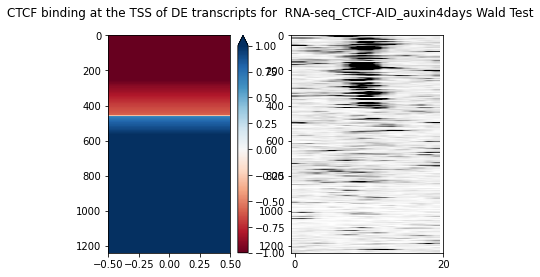

In [124]:
min_qval = 0.05
test_cond = conditions[3]

# todo: check that moved bigwig into shared proj folder / change the directory here
ctcf_binding_file = "/scratch/pokorny/Elphege_2017/GSM2609195_CTCF_ChIP-exo_WT-untagged_untreated_rep1_ENC1_tagDensity.bw"


plot_sleuth_wt_beta_CTCF_binding(test_cond, wt_data[test_cond], tss_df, ctcf_binding_file, min_qval, "CTCF binding at the TSS of DE transcripts for " + test_cond + " Wald Test")  

==== General percentages for Condition :  RNA-seq_CTCF-AID_auxin1day====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 76
Number of DE transcripts with an annotated TSS: 76
Number of up-regulated genes: 8
Number of down-regulated genes: 68

==== General percentages for Condition :  RNA-seq_CTCF-AID_auxin2days====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 173
Number of DE transcripts with an annotated TSS: 173
Number of up-regulated genes: 85
Number of down-regulated genes: 88

==== General percentages for Condition :  RNA-seq_CTCF-AID_auxin4days====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 1257
Number of DE transcripts with an annotated TSS: 1241
Number of up-regulated genes: 781
Number of down-regulated genes: 460

==== General percentages for Condition :  RNA-seq_CTCF-AID_washoff2days====
Setting qval cutoff to: 0.05
Number of DE transcripts with this cutoff: 38
Number of DE transcripts with an ann

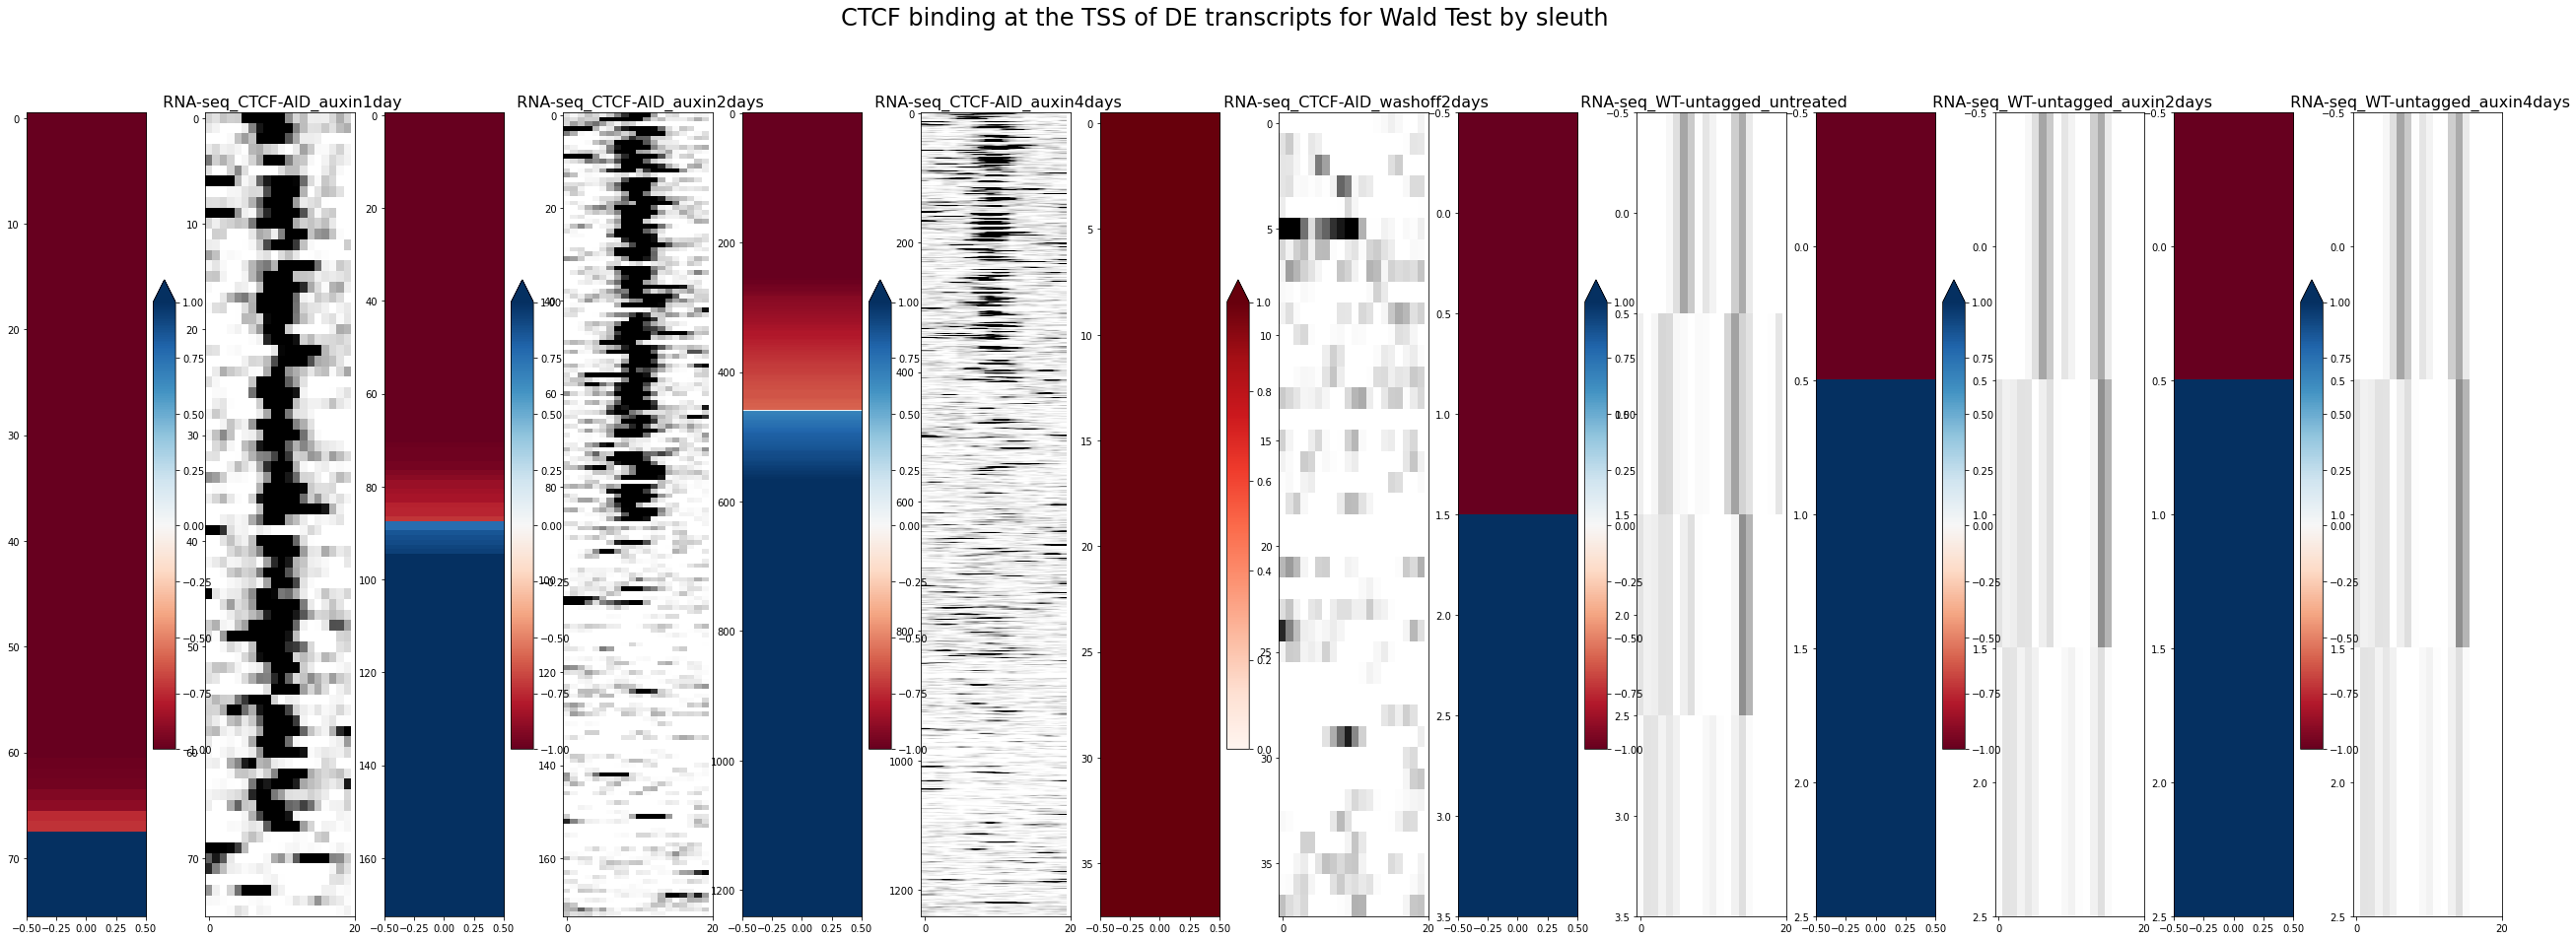

In [125]:
# Try refactored Fig 6 generation for all 10
plot_sleuth_wt_beta_CTCF_binding_together(wt_data, tss_df, ctcf_binding_file, min_qval, "CTCF binding at the TSS of DE transcripts for Wald Test by sleuth")


In [121]:
## For plotting the log change in FPKM, as a measure of differential expression, alongside the binding of 
## that transcript at it's TSS.
# 
# cutoff: the deltaFPKM to take
# DE_df: must have the columns 'delta' for the FPKM, must be in sorted order by delta
# CTCF ChIP-exo filepath
def plot_sleuth_wt_beta_CTCF_binding_together(DE_result_dict, tss_df, chip_seq_file, qval_cutoff, plot_title):
    
    
    # Getting plots ready
    fig, ax = plt.subplots(1,2*len(DE_result_dict), figsize=(45, 15))
    fig.suptitle(plot_title, fontsize=24)
    i = 0
    
    for condition, DE_result_df in DE_result_dict.items():

        # Extracting only rows that are above the cutoff
        sig_DE = DE_result_df[DE_result_df['qval_'+condition] < qval_cutoff]

        sig_DE = sig_DE.sort_values(by=['b_'+condition])

        n_DE_tot = len(sig_DE)

        # lookup the TSS for this set of transcripts
        window_df = sig_DE.merge(tss_df, left_on='target_id_'+condition, right_on='transcript_id') # TSS for the significant sets of genes

        # Generating summary of chip seq signal within the bins -1000 and +1000 from the TSS loc
        with bbi.open(chip_seq_file) as f:
            DE_matrix = f.stackup(window_df['chrom'], window_df['start'] - 1000, window_df['end'] + 1000, bins=20)


        # split by positive and negative values for plotting
        DE_up = window_df[window_df['b_'+condition] > 0]
        DE_down = window_df[window_df['b_'+condition] < 0]

        n = len(window_df)
        n_up = len(DE_up)
        n_down = len(DE_down)

        print("==== General percentages for Condition : " + condition + "====")
        print("Setting qval cutoff to: " + str(qval_cutoff))
        print("Number of DE transcripts with this cutoff: " + str(n_DE_tot))
        print("Number of DE transcripts with an annotated TSS: " + str(n))
        print("Number of up-regulated genes: " + str(n_up))
        print("Number of down-regulated genes: " + str(n_down))
        print()


        # extracting the beta change vector
        logFPKM = window_df['b_'+condition]
        logFPKM = np.transpose(np.expand_dims(logFPKM, axis=0))
        minval=np.min(logFPKM)
        maxval=np.max(logFPKM)
        # if diverging, color negative values blue
        if (minval < 0):
            divnorm=colors.TwoSlopeNorm(vmin=-1, vcenter=0., vmax=1)
            occ = ax[i].imshow(logFPKM, cmap='RdBu', norm=divnorm, aspect='auto')
        # pcolormesh(your_data, cmap="coolwarm", norm=divnorm)
        else:
            minval= 0
            occ = ax[i].imshow(logFPKM, cmap='Reds', norm=colors.Normalize(vmin=0, vmax=1), aspect='auto')


        cbar = ax[i].figure.colorbar(occ, ax=ax[i], extend='max')
        i+=1
        name = condition
        ax[i].set_title(name, fontsize=16)
        # Plotting ctcf binding
        fig = ax[i].imshow(DE_matrix, cmap='gray_r', aspect='auto', vmin=0, vmax=100)
        ax[i].set_xticks([0, 20])
        i+=1

    plt.show()

In [122]:

## For plotting the log change in FPKM, as a measure of differential expression, alongside the binding of 
## that transcript at it's TSS.
# 
# cutoff: the deltaFPKM to take
# DE_df: must have the columns 'delta' for the FPKM, must be in sorted order by delta
# CTCF ChIP-exo filepath
def plot_sleuth_wt_beta_CTCF_binding(condition, DE_result_df, tss_df, chip_seq_file, qval_cutoff, plot_title):

    # Extracting only rows that are above the cutoff
    sig_DE = DE_result_df[DE_result_df['qval_'+condition] < qval_cutoff]
    
    sig_DE = sig_DE.sort_values(by=['b_'+condition])
    
    n_DE_tot = len(sig_DE)
    
    # lookup the TSS for this set of transcripts
    window_df = sig_DE.merge(tss_df, left_on='target_id_'+condition, right_on='transcript_id') # TSS for the significant sets of genes
    
    # Generating summary of chip seq signal within the bins -1000 and +1000 from the TSS loc
    with bbi.open(chip_seq_file) as f:
        DE_matrix = f.stackup(window_df['chrom'], window_df['start'] - 1000, window_df['end'] + 1000, bins=20)
        

    # Getting plots ready
    fig, ax = plt.subplots(1,2)
    
    # split by positive and negative values for plotting
    DE_up = window_df[window_df['b_'+condition] > 0]
    DE_down = window_df[window_df['b_'+condition] < 0]
    
    n = len(window_df)
    n_up = len(DE_up)
    n_down = len(DE_down)
    
    print("Setting qval cutoff to: " + str(qval_cutoff))
    print("Number of DE transcripts with this cutoff: " + str(n_DE_tot))
    print("Number of DE transcripts with an annotated TSS: " + str(n))
    print("Number of up-regulated genes: " + str(n_up))
    print("Number of down-regulated genes: " + str(n_down))
    

    # extracting the beta change vector
    logFPKM = window_df['b_'+condition]
    logFPKM = np.transpose(np.expand_dims(logFPKM, axis=0))
    minval=np.min(logFPKM)
    maxval=np.max(logFPKM)
    # if diverging, color negative values blue
    if (minval < 0):
        divnorm=colors.TwoSlopeNorm(vmin=-1, vcenter=0., vmax=1)
        occ = ax[0].imshow(logFPKM, cmap='RdBu', norm=divnorm, aspect='auto')
    # pcolormesh(your_data, cmap="coolwarm", norm=divnorm)
    else:
        minval= 0
        occ = ax[0].imshow(logFPKM, cmap='Reds', norm=colors.Normalize(vmin=0, vmax=1), aspect='auto')
        

    fig.colorbar(occ, ax=ax[0], extend='max')
    fig.suptitle(plot_title)
    # Plotting ctcf binding
    fig = ax[1].imshow(DE_matrix, cmap='gray_r', aspect='auto', vmin=0, vmax=100)
    ax[1].set_xticks([0, 20])
    

    plt.show()